# Data Analysis - Data Madness
## An analysis on the success of Kickstarter Projects

#### Brian Huynen, ID: I6097103, Tim Smeets, ID: I6071641

## Questions

What is the range of budget asked that will have the highest chance of success?

How important is the category of the project? (i.e. do video games have a higher probability of getting funded compared to movies for instance)

Since the creator can choose a deadline by which the funding has to be completed (or the funding will fail and the pledged money will be returned to the users), what is the optimal range of weeks/months that will increase the chance of success?


## Loading in the dataset

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

df = pd.read_csv('ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
# df.isnull().sum() #UNCOMMENT TO CHECK

From checking the amount of entries with null values, there is barely anything undefined, except for a couple of thousand entries in the `usd pledged` caregory. Presumably these are entries that did not gain any pledges whatsoever and are therefore 0.

In [4]:
# df.dtypes

In [5]:
# df.state.value_counts()
# len(np.unique(df.category)), len(np.unique(df.main_category))

# Preprocessing

In [6]:
from datetime import datetime as dtm
date_format = '%Y-%m-%d'

df = df[df.name.notnull()]

projects = df[df['state'].isin(['failed', 'successful'])]

projects = projects.drop(['ID', 'name', 'category', 'currency', 'country'], axis=1)

launch_nt = []
for ele in projects['launched']:
    launch_nt.append(ele.split()[0])

projects['launched_notime'] = launch_nt

duration = []

### TESTING PURPOSE ONLY
# test_projects = projects.head()

# for index, ele in test_projects[['deadline', 'launched_notime']].iterrows():
#     print(ele[0], ele[1])
#     dur = dtm.strptime(ele[0], date_format) - dtm.strptime(ele[1], date_format)
#     print(dur.days)

for index, ele in projects[['deadline', 'launched_notime']].iterrows():
    dur = dtm.strptime(ele[0], date_format) - dtm.strptime(ele[1], date_format)
    duration.append(dur.days)
    
projects['duration'] = duration

The duration of a project is measured in days and is calculated by converting `deadline` and `launched` to a `date(year, month, day)` object. Then, using the `datetime` library, we can calculate the duration of the project by subtracting the launchtime from the deadline.

In [7]:
success = []
fail = []

for i, value in enumerate(projects.state):
    if value == 'successful':
#         print('ok')
        success.append(i)
    elif value == 'failed':
        fail.append(i)

In [8]:
len(success), len(fail)

(133956, 197716)

We do not take in consideration the canceled or terminated (e.g. due to infringement) projects.

In [9]:
projects_success = projects.iloc[success]
projects_fail = projects.iloc[fail]

# EDA and Visualization

## Allocated goals of all successful and failed projects

We consider four categories of goals:

- 0-1000 USD
- 1001-10000 USD
- 10001-50000 USD
- 50000+ USD

We check these categories over the set of failed and successful projects individually and use a stacked barplot to explore the distribution of fail/ success over the entire dataset.

In [10]:
success_0_to_1000 = projects_success.loc[projects_success.usd_goal_real <= 1000]
success_1000_to_10000 = projects_success.loc[(projects_success.usd_goal_real > 1000) & (projects_success.usd_goal_real <= 10000)]
success_10000_to_50000 = projects_success.loc[(projects_success.usd_goal_real > 10000) & (projects_success.usd_goal_real <= 50000)]
success_over_50000 = projects_success.loc[projects_success.usd_goal_real > 50000]

fail_0_to_1000 = projects_fail.loc[projects_fail.usd_goal_real <= 1000]
fail_1000_to_10000 = projects_fail.loc[(projects_fail.usd_goal_real > 1000) & (projects_fail.usd_goal_real <= 10000)]
fail_10000_to_50000 = projects_fail.loc[(projects_fail.usd_goal_real > 10000) & (projects_fail.usd_goal_real <= 50000)]
fail_over_50000 = projects_fail.loc[projects_fail.usd_goal_real > 50000]

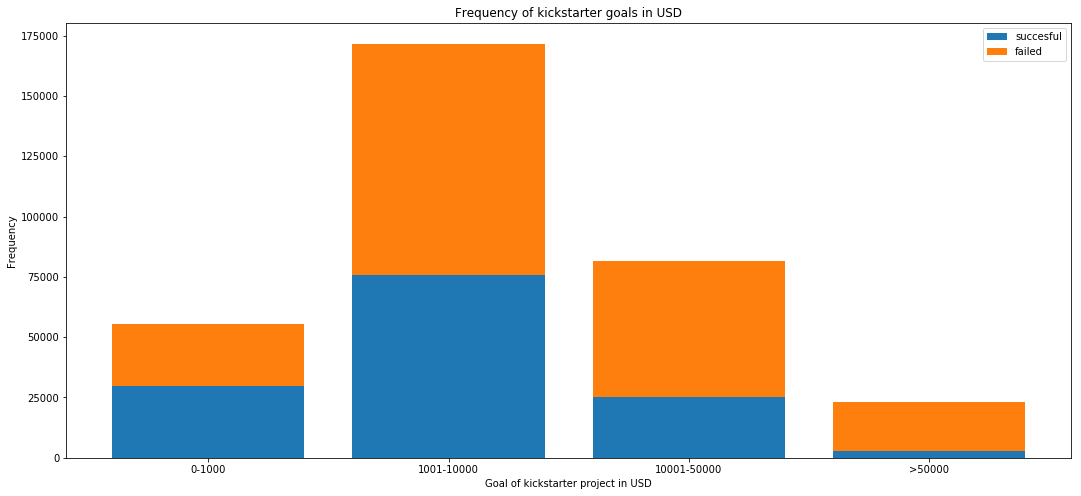

In [11]:
plt.figure(figsize=(18,8))

height_fail = [len(fail_0_to_1000) , len(fail_1000_to_10000) , len(fail_10000_to_50000) , len(fail_over_50000)]
height_succ = [len(success_0_to_1000) , len(success_1000_to_10000) , len(success_10000_to_50000) , len(success_over_50000)]

bars = ['0-1000', '1001-10000', '10001-50000', '>50000']
y_pos = np.arange(len(bars))

plt.bar(y_pos, height_succ, label='succesful')
plt.bar(y_pos, height_fail, bottom=height_succ, label='failed')
plt.xticks(y_pos, bars)
plt.xlabel('Goal of kickstarter project in USD')
plt.ylabel('Frequency')
plt.title('Frequency of kickstarter goals in USD')
plt.legend()
plt.show()

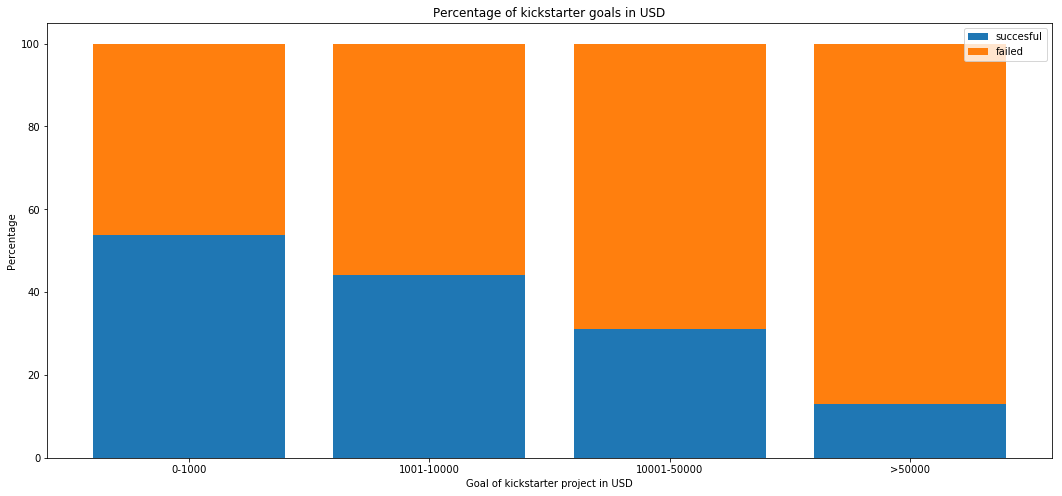

In [12]:
plt.figure(figsize=(18,8))

height_fail = [len(fail_0_to_1000) , len(fail_1000_to_10000) , len(fail_10000_to_50000) , len(fail_over_50000)]
height_succ = [len(success_0_to_1000) , len(success_1000_to_10000) , len(success_10000_to_50000) , len(success_over_50000)]

totals = [i+j for i,j in zip(height_fail, height_succ)]

height_fail_p = [i/j * 100 for i,j in zip(height_fail, totals)]
height_succ_p = [i/j * 100 for i,j in zip(height_succ, totals)]

plt.bar(y_pos, height_succ_p, label='succesful')
plt.bar(y_pos, height_fail_p, bottom=height_succ_p, label='failed')
plt.xticks(y_pos, bars)
plt.xlabel('Goal of kickstarter project in USD')
plt.ylabel('Percentage')
plt.title('Percentage of kickstarter goals in USD')
plt.legend()
plt.show()

In [13]:
height_succ_p

[53.796795299291645, 44.142302068587874, 31.047710087380665, 13.07836553137674]

Percentually speaking, higher goals are less likely to succeed. However, there are far less projects with a goal of that category than others - seemingly about 44% of projects with goal budget in between 1000 and 10000 USD succeed whereas projects with less than 1000 goal budget seem to be successful 53% of the time.

For the larger goal categories, 10001-50000 USD and 50000+ USD, 31 and 13% of the projects succeed respectively.

## Duration of the projects

We consider three categories of duration:

- 0-30 days (<1mo)
- 31-60 days (1-2mo)
- 60+ days (>2mo)

Similarly to the goal, we check these categories over the set of failed and successful projects individually and use a stacked barplot to explore the distribution of fail/ success over the entire dataset.

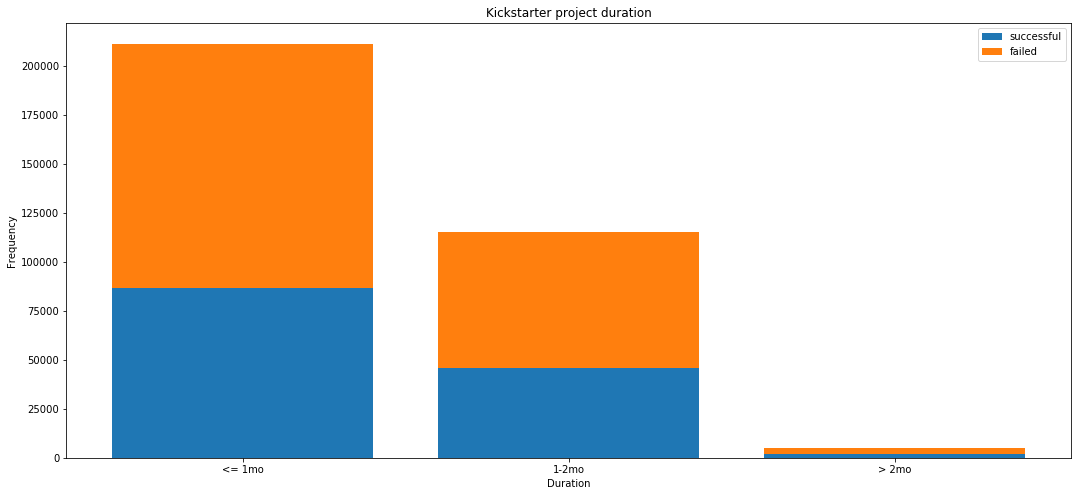

In [14]:
plt.figure(figsize=(18,8))

p01 = projects_success[projects_success.duration <= 30]
p12 = projects_success[(projects_success.duration > 30) & (projects_success.duration <= 60)]
p2 = projects_success[projects_success.duration > 60]

projects_success_bars = [len(p01), len(p12), len(p2)]

p01 = projects_fail[projects_fail.duration <= 30]
p12 = projects_fail[(projects_fail.duration > 30) & (projects_fail.duration <= 60)]
p2 = projects_fail[projects_fail.duration > 60]

projects_fail_bars = [len(p01), len(p12), len(p2)]

bars = ['<= 1mo', '1-2mo', '> 2mo']
y_pos = np.arange(len(bars))

plt.bar(y_pos, projects_success_bars, label='successful')
plt.bar(y_pos, projects_fail_bars, bottom=projects_success_bars, label='failed')
plt.xticks(y_pos, bars)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Kickstarter project duration')
plt.legend()
plt.show()

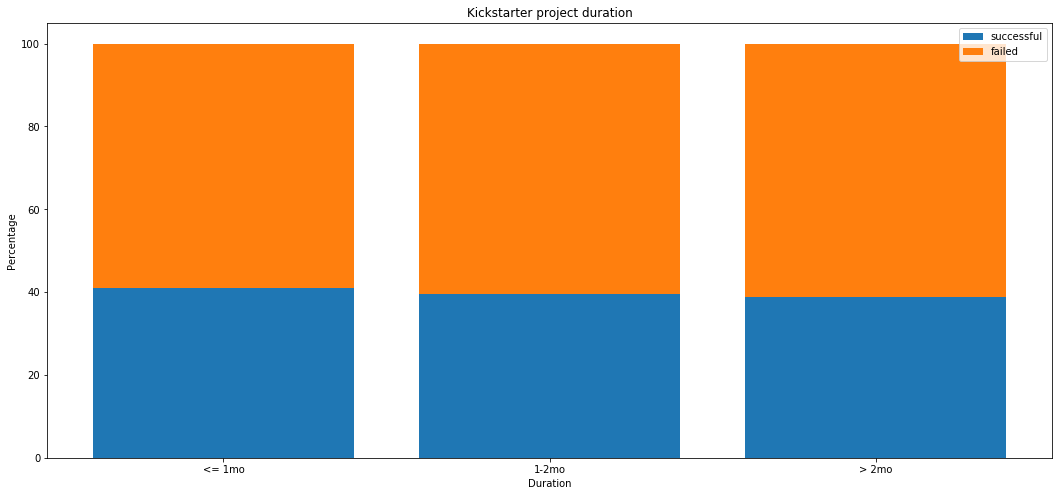

In [15]:
p_tot0 = projects_success_bars[0] + projects_fail_bars[0]
p_tot1 = projects_success_bars[1] + projects_fail_bars[1]
p_tot2 = projects_success_bars[2] + projects_fail_bars[2]

totals = [p_tot0, p_tot1, p_tot2]

p_succ_perc = [i/j * 100 for i,j in zip(projects_success_bars, totals)]
p_fail_perc = [i/j * 100 for i,j in zip(projects_fail_bars, totals)]

plt.figure(figsize=(18,8))

plt.bar(y_pos, p_succ_perc, label='successful')
plt.bar(y_pos, p_fail_perc, bottom=p_succ_perc, label='failed')
plt.xticks(y_pos, bars)
plt.xlabel('Duration')
plt.ylabel('Percentage')
plt.title('Kickstarter project duration')
plt.legend()
plt.show()

In [16]:
p_succ_perc

[40.88984954760227, 39.53768443670453, 38.743781094527364]

It can be noted that the majority of the projects span one month or shorter. The Kickstarter staff themselves mention that projects of smaller duration seem more successful than the long ones (Source: https://www.kickstarter.com/blog/shortening-the-maximum-project-length)

However, the above observation shows that, at least within the dataset, the success rate is roughly the same, about 40%.

The code below shows the distribution of project duration within the three categories:

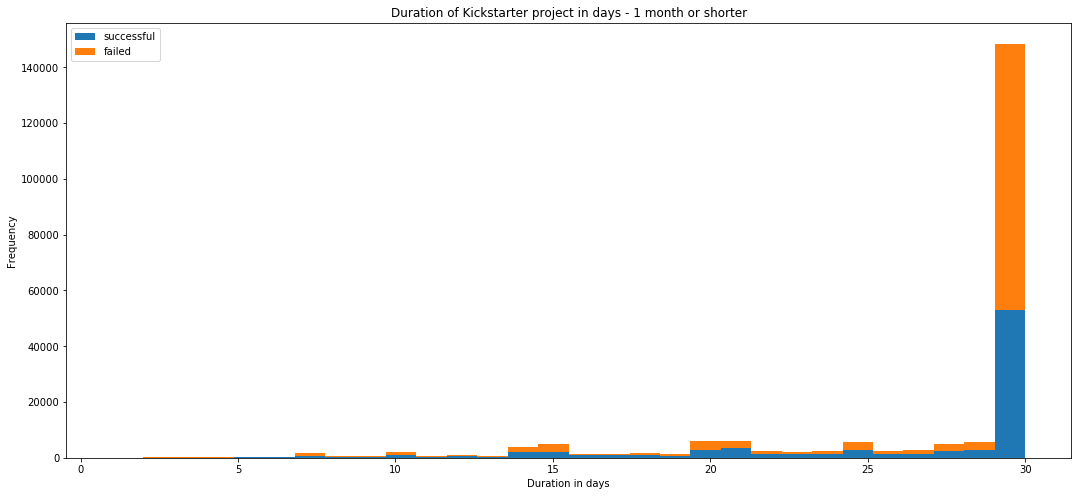

In [17]:
plt.figure(figsize=(18,8))

plt.hist([projects_success.duration, projects_fail.duration], label=['successful', 'failed'], bins = 30, range=(1,30), stacked=True)
plt.xlabel('Duration in days')
plt.ylabel('Frequency')
plt.title('Duration of Kickstarter project in days - 1 month or shorter')
plt.legend()
plt.show()

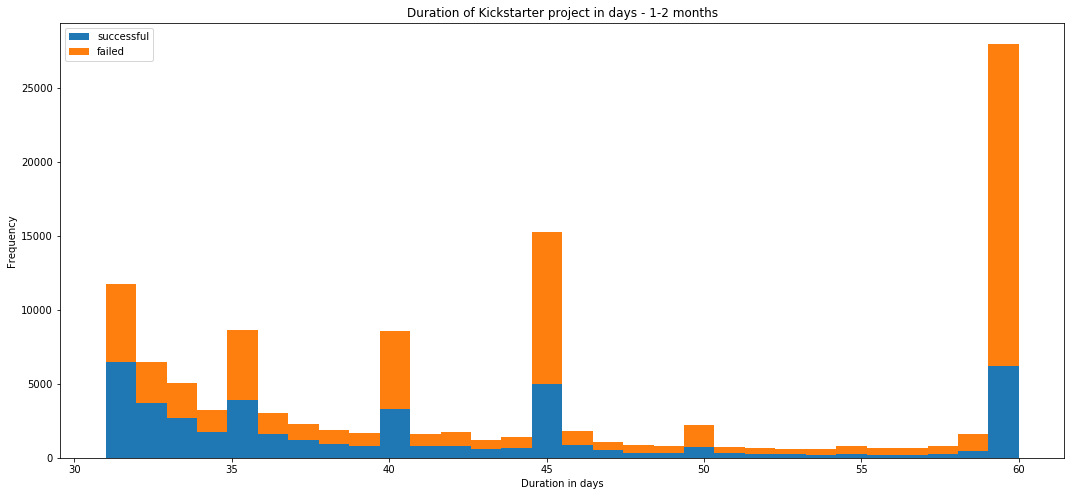

In [18]:
plt.figure(figsize=(18,8))

plt.hist([projects_success.duration, projects_fail.duration], label=['successful', 'failed'], bins = 30, range=(31,60), stacked=True)
plt.xlabel('Duration in days')
plt.ylabel('Frequency')
plt.title('Duration of Kickstarter project in days - 1-2 months')
plt.legend()
plt.show()

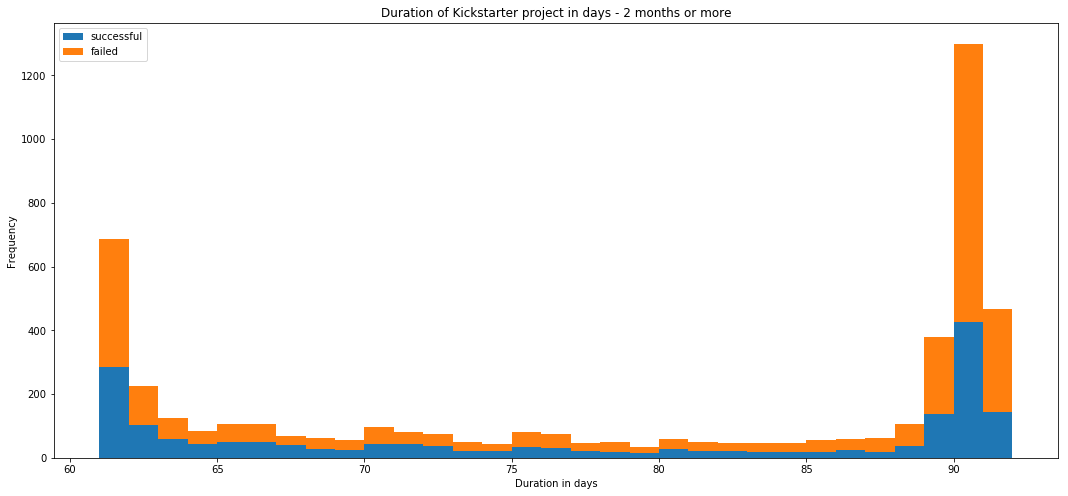

In [19]:
plt.figure(figsize=(18,8))

plt.hist([projects_success.duration, projects_fail.duration], label=['successful', 'failed'], bins = 31, range=(61,92), stacked=True)
plt.xlabel('Duration in days')
plt.ylabel('Frequency')
plt.title('Duration of Kickstarter project in days - 2 months or more')
plt.legend()
plt.show()

## Project Category distribution

It is easier to plot a graph over the 15 main categories than it is to plot over the 159 subcategories. This has been taken in account for when pre-processing the dataset.

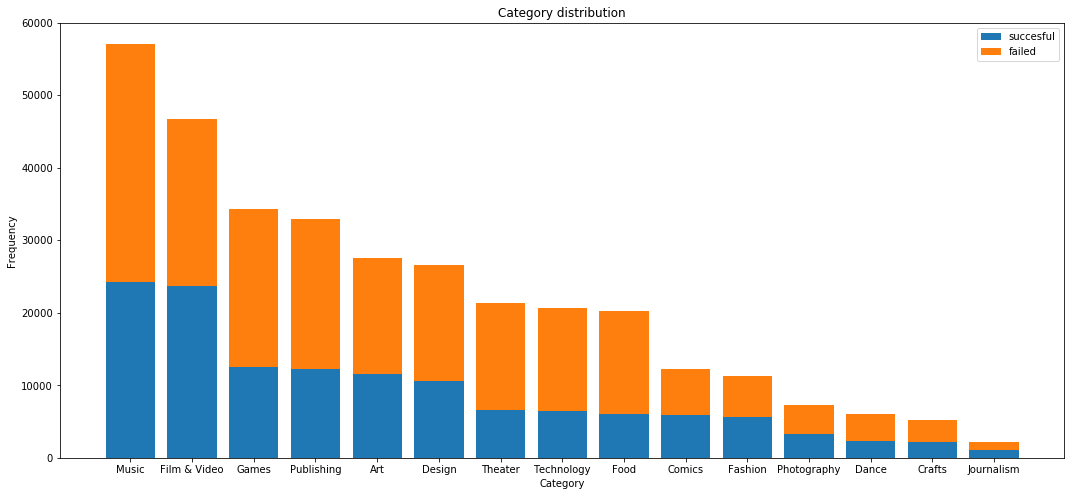

In [20]:
cats_succ = []
cats = []

for cat, ele in projects_success.main_category.value_counts().iteritems():
    cats_succ.append(ele)
    cats.append(cat)
    
cats_fail = []

for cat, ele in projects_fail.main_category.value_counts().iteritems():
    cats_fail.append(ele)

plt.figure(figsize=(18,8))

y_pos = np.arange(len(cats))

plt.bar(y_pos, cats_succ, label='succesful')
plt.bar(y_pos, cats_fail, bottom=cats_succ, label='failed')
plt.xticks(y_pos, cats)

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Category distribution')
plt.legend()
plt.show()

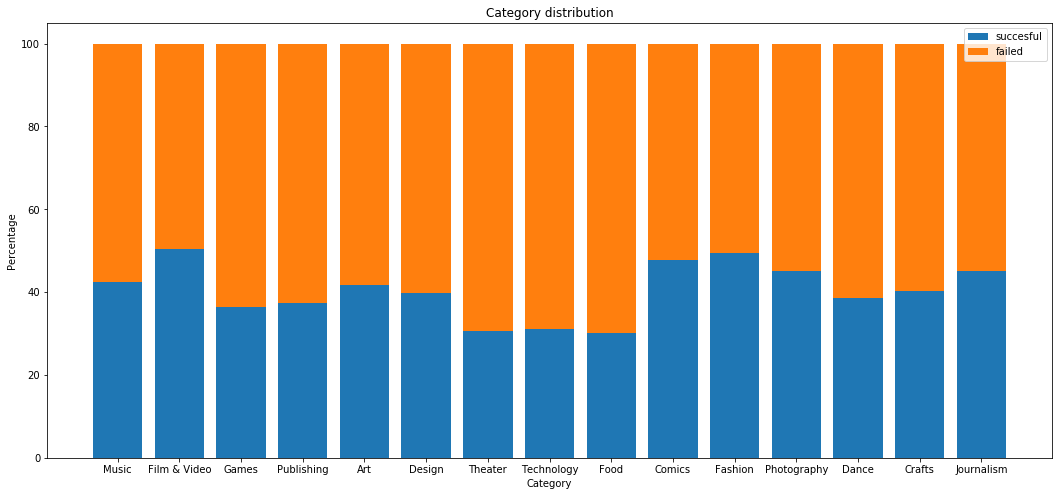

In [21]:
totals = [i+j for i,j in zip(cats_succ, cats_fail)]

cat_succ_p = [i/j * 100 for i,j in zip(cats_succ, totals)]
cat_fail_p = [i/j * 100 for i,j in zip(cats_fail, totals)]

plt.figure(figsize=(18,8))

plt.bar(y_pos, cat_succ_p, label='succesful')
plt.bar(y_pos, cat_fail_p, bottom=cat_succ_p, label='failed')
plt.xticks(y_pos, cats)

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Category distribution')
plt.legend()
plt.show()

In [22]:
cat_succ_p[:3]

[42.37653239929948, 50.51103318508382, 36.527575138605194]

It can be noted that the most popular categories (Music, Film and Video, and Games) all have a different chance of success.

## Categorical Analysis

In the graphs below, the average amount of backers, money obtained from pledgers, duration and goal allocation are given per main category.

Each grouped barchart shows the average over the failed projects, the successful projects and the entire dataset.

In [23]:
cat_averages = projects.copy()
cat_averages = cat_averages.drop(['deadline', 'goal', 'launched', 'pledged', 'usd pledged', 'launched_notime'], axis=1)

cat_averages_fail = cat_averages.loc[cat_averages['state'] == 'failed']
cat_averages_succ = cat_averages.loc[cat_averages['state'] == 'successful']

avg_backer = []
avg_pledge = []
avg_dur = []
avg_goal = []

for category, subset in cat_averages.groupby('main_category'):
#     print('avg of cat', category, 'is\n', subset.mean())
    avg_backer.append(subset.backers.mean())
    avg_pledge.append(subset.usd_pledged_real.mean())
    avg_goal.append(subset.usd_goal_real.mean())
    avg_dur.append(subset.duration.mean())

avg_b_f = []
avg_p_f = []
avg_d_f = []
avg_g_f = []

for category, subset in cat_averages_fail.groupby('main_category'):
#     print('avg of cat', category, 'is\n', subset.mean())
    avg_b_f.append(subset.backers.mean())
    avg_p_f.append(subset.usd_pledged_real.mean())
    avg_g_f.append(subset.usd_goal_real.mean())
    avg_d_f.append(subset.duration.mean())

avg_b_s = []
avg_p_s = []
avg_d_s = []
avg_g_s = []

for category, subset in cat_averages_succ.groupby('main_category'):
#     print('avg of cat', category, 'is\n', subset.mean())
    avg_b_s.append(subset.backers.mean())
    avg_p_s.append(subset.usd_pledged_real.mean())
    avg_g_s.append(subset.usd_goal_real.mean())
    avg_d_s.append(subset.duration.mean())

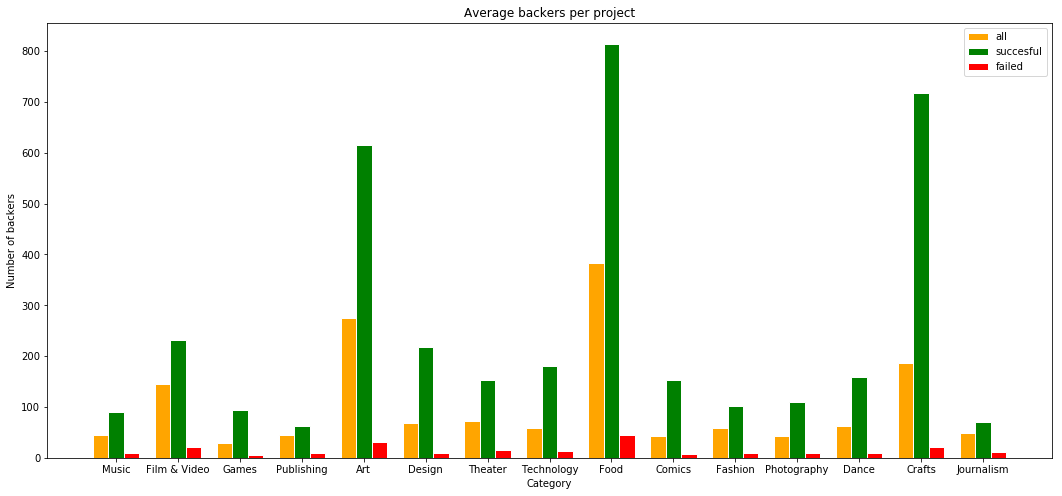

In [24]:
barWidth = 0.25

r1 = np.arange(len(avg_backer))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(18,8))

plt.bar(r1, avg_backer, label='all', width=barWidth, color='orange', edgecolor='white')
plt.bar(r2, avg_b_s, label='succesful', width=barWidth, color='green', edgecolor='white')
plt.bar(r3, avg_b_f, label='failed', width=barWidth, color='red', edgecolor='white')

plt.xlabel('Category')
plt.ylabel('Number of backers')
plt.title('Average backers per project')
plt.xticks([r+barWidth for r in range(len(avg_backer))], cats)


plt.legend()
plt.show()

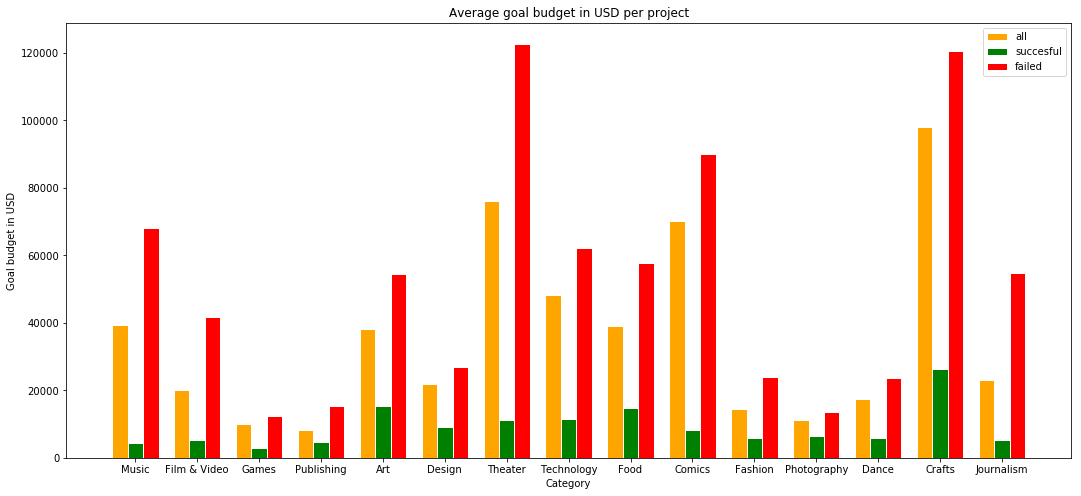

In [25]:
barWidth = 0.25

r1 = np.arange(len(avg_goal))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(18,8))

plt.bar(r1, avg_goal, label='all', width=barWidth, color='orange', edgecolor='white')
plt.bar(r2, avg_g_s, label='succesful', width=barWidth, color='green', edgecolor='white')
plt.bar(r3, avg_g_f, label='failed', width=barWidth, color='red', edgecolor='white')

plt.xlabel('Category')
plt.ylabel('Goal budget in USD')
plt.title('Average goal budget in USD per project')
plt.xticks([r+barWidth for r in range(len(avg_backer))], cats)


plt.legend()
plt.show()

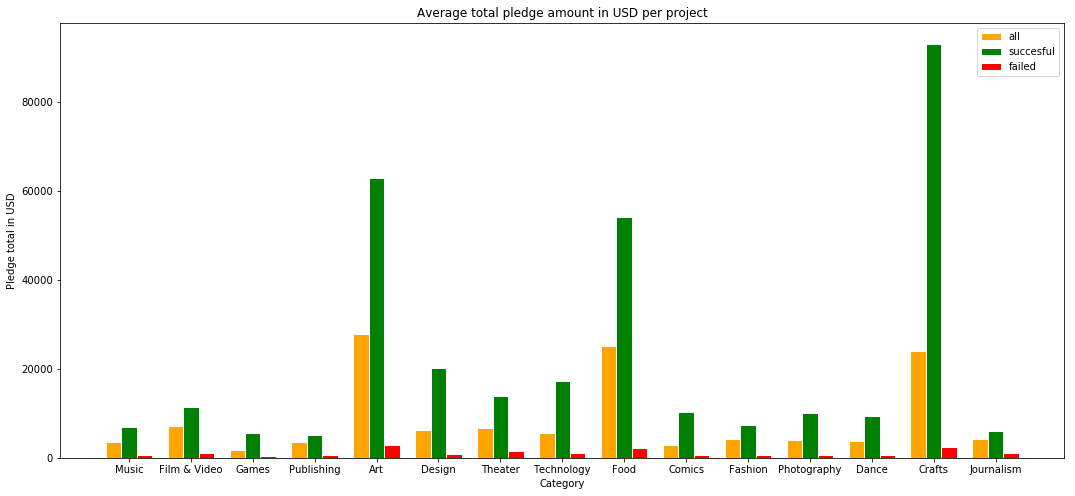

In [26]:
barWidth = 0.25

r1 = np.arange(len(avg_pledge))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(18,8))

plt.bar(r1, avg_pledge, label='all', width=barWidth, color='orange', edgecolor='white')
plt.bar(r2, avg_p_s, label='succesful', width=barWidth, color='green', edgecolor='white')
plt.bar(r3, avg_p_f, label='failed', width=barWidth, color='red', edgecolor='white')

plt.xlabel('Category')
plt.ylabel('Pledge total in USD')
plt.title('Average total pledge amount in USD per project')
plt.xticks([r+barWidth for r in range(len(avg_backer))], cats)


plt.legend()
plt.show()

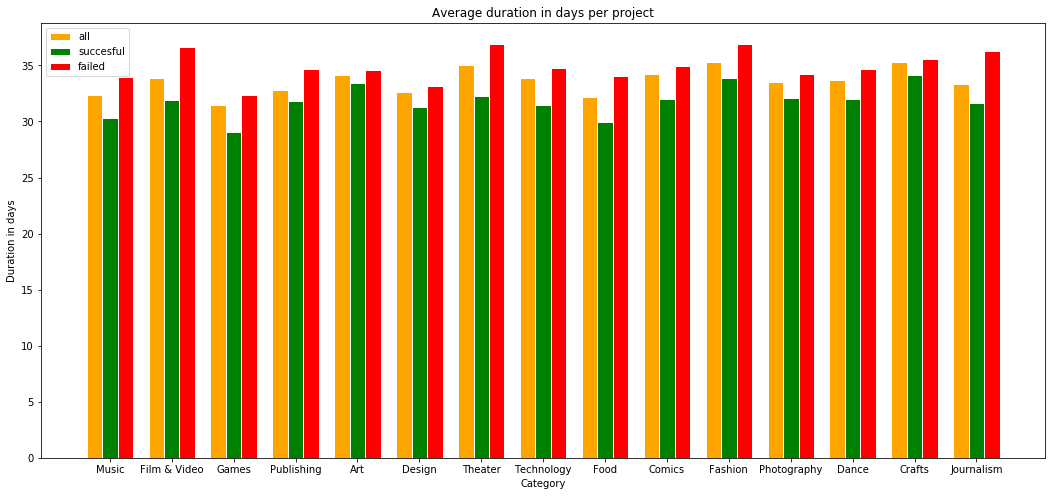

In [27]:
barWidth = 0.25

r1 = np.arange(len(avg_pledge))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(18,8))

plt.bar(r1, avg_dur, label='all', width=barWidth, color='orange', edgecolor='white')
plt.bar(r2, avg_d_s, label='succesful', width=barWidth, color='green', edgecolor='white')
plt.bar(r3, avg_d_f, label='failed', width=barWidth, color='red', edgecolor='white')

plt.xlabel('Category')
plt.ylabel('Duration in days')
plt.title('Average duration in days per project')
plt.xticks([r+barWidth for r in range(len(avg_backer))], cats)


plt.legend()
plt.show()

# Exploring the most popular categories

In [28]:
music_succ = projects_success[projects_success.main_category == 'Music']
film_succ = projects_success[projects_success.main_category == 'Film & Video']
games_succ = projects_success[projects_success.main_category == 'Games']

music_fail = projects_fail[projects_fail.main_category == 'Music']
film_fail = projects_fail[projects_fail.main_category == 'Film & Video']
games_fail = projects_fail[projects_fail.main_category == 'Games']

## Music

### Duration

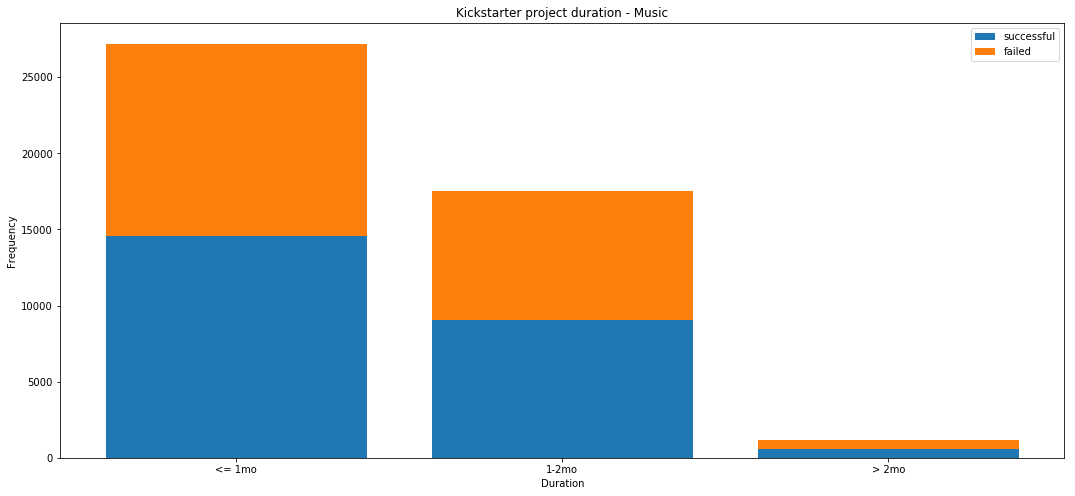

In [29]:
plt.figure(figsize=(18,8))

mo01 = music_succ[music_succ.duration <= 30]
mo12 = music_succ[(music_succ.duration > 30) & (music_succ.duration <= 60)]
mo2 = music_succ[music_succ.duration > 60]

music_succ_bars = [len(mo01), len(mo12), len(mo2)]

mo01 = music_fail[music_fail.duration <= 30]
mo12 = music_fail[(music_fail.duration > 30) & (music_fail.duration <= 60)]
mo2 = music_fail[music_fail.duration > 60]

music_fail_bars = [len(mo01), len(mo12), len(mo2)]

bars = ['<= 1mo', '1-2mo', '> 2mo']
y_pos = np.arange(len(bars))

plt.bar(y_pos, music_succ_bars, label='successful')
plt.bar(y_pos, music_fail_bars, bottom=music_succ_bars, label='failed')
plt.xticks(y_pos, bars)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Kickstarter project duration - Music')
plt.legend()
plt.show()

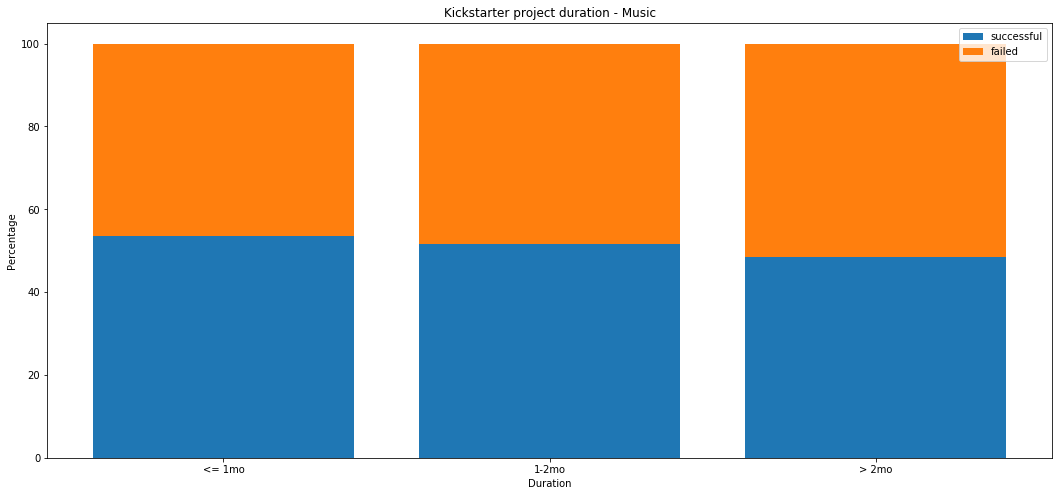

In [30]:
m_tot0 = music_succ_bars[0] + music_fail_bars[0]
m_tot1 = music_succ_bars[1] + music_fail_bars[1]
m_tot2 = music_succ_bars[2] + music_fail_bars[2]

totals = [m_tot0, m_tot1, m_tot2]

m_succ_perc = [i/j * 100 for i,j in zip(music_succ_bars, totals)]
m_fail_perc = [i/j * 100 for i,j in zip(music_fail_bars, totals)]

plt.figure(figsize=(18,8))

plt.bar(y_pos, m_succ_perc, label='successful')
plt.bar(y_pos, m_fail_perc, bottom=m_succ_perc, label='failed')
plt.xticks(y_pos, bars)
plt.xlabel('Duration')
plt.ylabel('Percentage')
plt.title('Kickstarter project duration - Music')
plt.legend()
plt.show()

In [31]:
m_succ_perc

[53.54044117647059, 51.58386508659982, 48.45446950710108]

Most projects in this category have a campaign duration of 1 month or lower, but the percentual chance of success seems close (within a margin of 5%)

### Goals

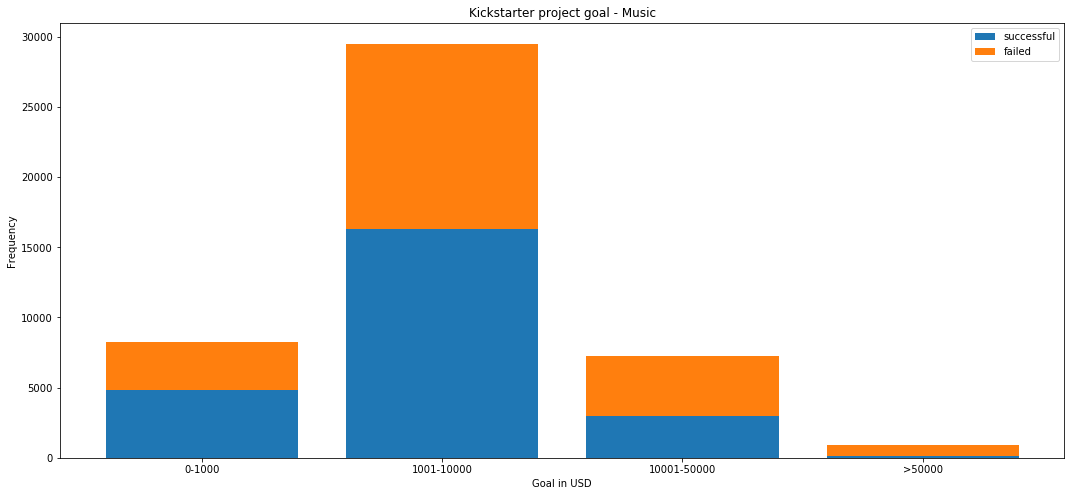

In [32]:
ms0 = music_succ[music_succ.usd_goal_real <= 1000]
ms1 = music_succ[(music_succ.usd_goal_real > 1000) & (music_succ.usd_goal_real <= 10000)]
ms2 = music_succ[(music_succ.usd_goal_real > 10000) & (music_succ.usd_goal_real <= 50000)]
ms3 = music_succ[music_succ.usd_goal_real > 50000]

mf0 = music_fail[music_fail.usd_goal_real <= 1000]
mf1 = music_fail[(music_fail.usd_goal_real > 1000) & (music_fail.usd_goal_real <= 10000)]
mf2 = music_fail[(music_fail.usd_goal_real > 10000) & (music_fail.usd_goal_real <= 50000)]
mf3 = music_fail[music_fail.usd_goal_real > 50000]

music_succ_bars = [len(ms0),len(ms1),len(ms2),len(ms3)]
music_fail_bars = [len(mf0),len(mf1),len(mf2),len(mf3)]

bars = ['0-1000', '1001-10000', '10001-50000', '>50000']
y_pos = np.arange(len(bars))

plt.figure(figsize=(18,8))

plt.bar(y_pos, music_succ_bars, label='successful')
plt.bar(y_pos, music_fail_bars, bottom=music_succ_bars, label='failed')
plt.xticks(y_pos, bars)
plt.xlabel('Goal in USD')
plt.ylabel('Frequency')
plt.title('Kickstarter project goal - Music')
plt.legend()
plt.show()

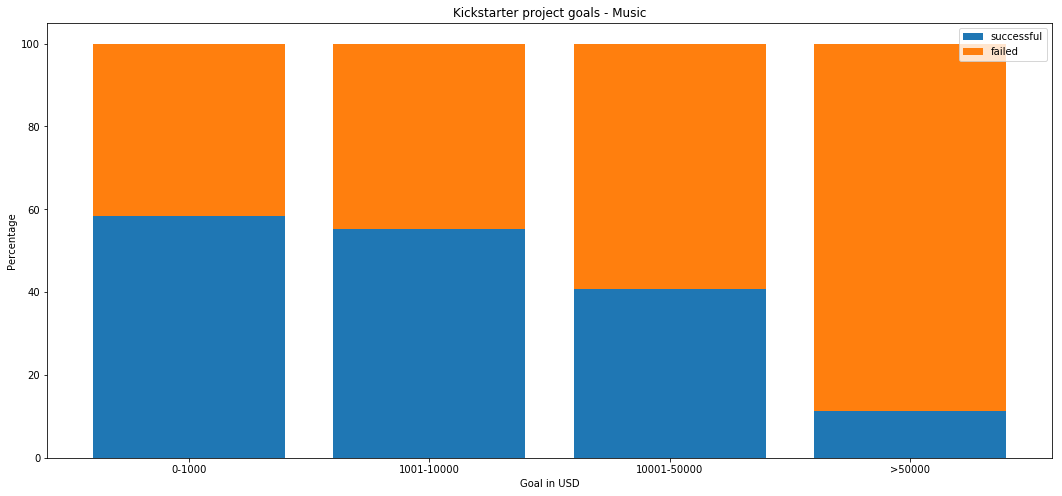

In [33]:
m_tot0 = music_succ_bars[0] + music_fail_bars[0]
m_tot1 = music_succ_bars[1] + music_fail_bars[1]
m_tot2 = music_succ_bars[2] + music_fail_bars[2]
m_tot3 = music_succ_bars[3] + music_fail_bars[3]

totals = [m_tot0, m_tot1, m_tot2, m_tot3]

m_succ_perc = [i/j * 100 for i,j in zip(music_succ_bars, totals)]
m_fail_perc = [i/j * 100 for i,j in zip(music_fail_bars, totals)]

plt.figure(figsize=(18,8))

plt.bar(y_pos, m_succ_perc, label='successful')
plt.bar(y_pos, m_fail_perc, bottom=m_succ_perc, label='failed')
plt.xticks(y_pos, bars)
plt.xlabel('Goal in USD')
plt.ylabel('Percentage')
plt.title('Kickstarter project goals - Music')
plt.legend()
plt.show()

In [34]:
m_succ_perc

[58.27277131782945, 55.34625287979401, 40.67117801408645, 11.217948717948719]

There is a very high chance for a project to fail if the goal exceeds 50000 USD. In turn, it is the least prevalent project amongst the four categories.

The most prevalent goal is in between the 1001-10000 USD range and has a success rate of 55%

## Film & Video

### Duration

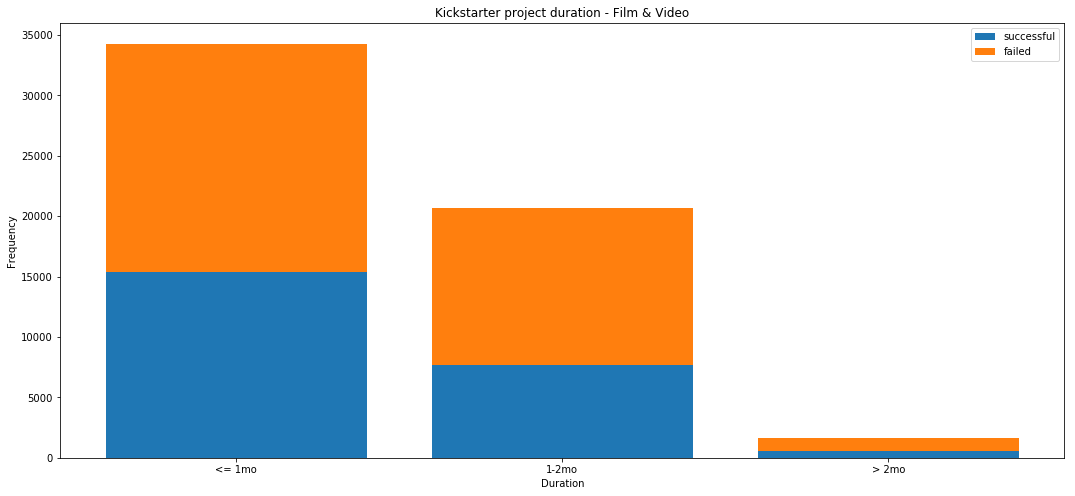

In [35]:
plt.figure(figsize=(18,8))

mo01 = film_succ[film_succ.duration <= 30]
mo12 = film_succ[(film_succ.duration > 30) & (film_succ.duration <= 60)]
mo2 = film_succ[film_succ.duration > 60]

film_succ_bars = [len(mo01), len(mo12), len(mo2)]

mo01 = film_fail[film_fail.duration <= 30]
mo12 = film_fail[(film_fail.duration > 30) & (film_fail.duration <= 60)]
mo2 = film_fail[film_fail.duration > 60]

film_fail_bars = [len(mo01), len(mo12), len(mo2)]

bars = ['<= 1mo', '1-2mo', '> 2mo']
y_pos = np.arange(len(bars))

plt.bar(y_pos, film_succ_bars, label='successful')
plt.bar(y_pos, film_fail_bars, bottom=film_succ_bars, label='failed')
plt.xticks(y_pos, bars)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Kickstarter project duration - Film & Video')
plt.legend()
plt.show()

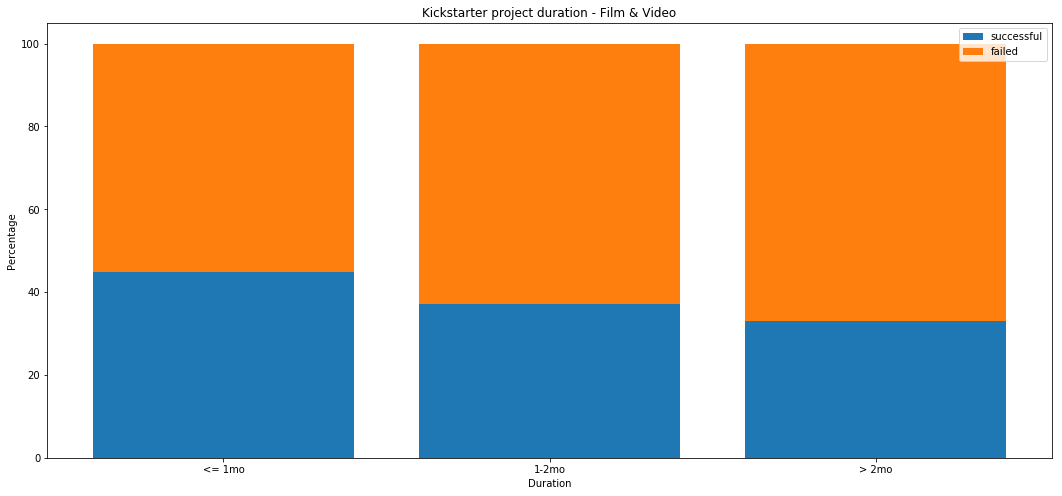

In [36]:
f_tot0 = film_succ_bars[0] + film_fail_bars[0]
f_tot1 = film_succ_bars[1] + film_fail_bars[1]
f_tot2 = film_succ_bars[2] + film_fail_bars[2]

totals = [f_tot0, f_tot1, f_tot2]

f_succ_perc = [i/j * 100 for i,j in zip(film_succ_bars, totals)]
f_fail_perc = [i/j * 100 for i,j in zip(film_fail_bars, totals)]

plt.figure(figsize=(18,8))

plt.bar(y_pos, f_succ_perc, label='successful')
plt.bar(y_pos, f_fail_perc, bottom=f_succ_perc, label='failed')
plt.xticks(y_pos, bars)
plt.xlabel('Duration')
plt.ylabel('Percentage')
plt.title('Kickstarter project duration - Film & Video')
plt.legend()
plt.show()

### Goals

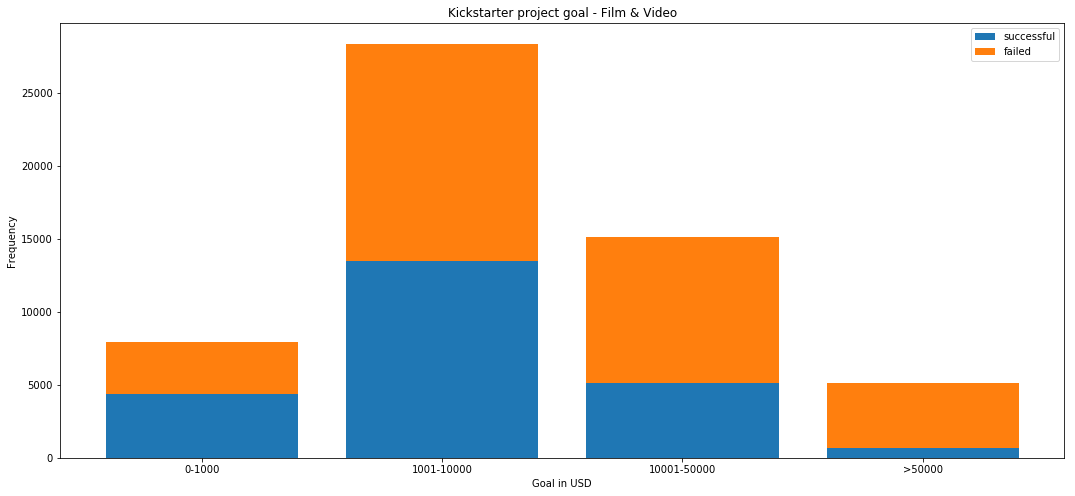

In [37]:
ms0 = film_succ[film_succ.usd_goal_real <= 1000]
ms1 = film_succ[(film_succ.usd_goal_real > 1000) & (film_succ.usd_goal_real <= 10000)]
ms2 = film_succ[(film_succ.usd_goal_real > 10000) & (film_succ.usd_goal_real <= 50000)]
ms3 = film_succ[film_succ.usd_goal_real > 50000]

mf0 = film_fail[film_fail.usd_goal_real <= 1000]
mf1 = film_fail[(film_fail.usd_goal_real > 1000) & (film_fail.usd_goal_real <= 10000)]
mf2 = film_fail[(film_fail.usd_goal_real > 10000) & (film_fail.usd_goal_real <= 50000)]
mf3 = film_fail[film_fail.usd_goal_real > 50000]

film_succ_bars = [len(ms0),len(ms1),len(ms2),len(ms3)]
film_fail_bars = [len(mf0),len(mf1),len(mf2),len(mf3)]

bars = ['0-1000', '1001-10000', '10001-50000', '>50000']
y_pos = np.arange(len(bars))

plt.figure(figsize=(18,8))

plt.bar(y_pos, film_succ_bars, label='successful')
plt.bar(y_pos, film_fail_bars, bottom=film_succ_bars, label='failed')
plt.xticks(y_pos, bars)
plt.xlabel('Goal in USD')
plt.ylabel('Frequency')
plt.title('Kickstarter project goal - Film & Video')
plt.legend()
plt.show()

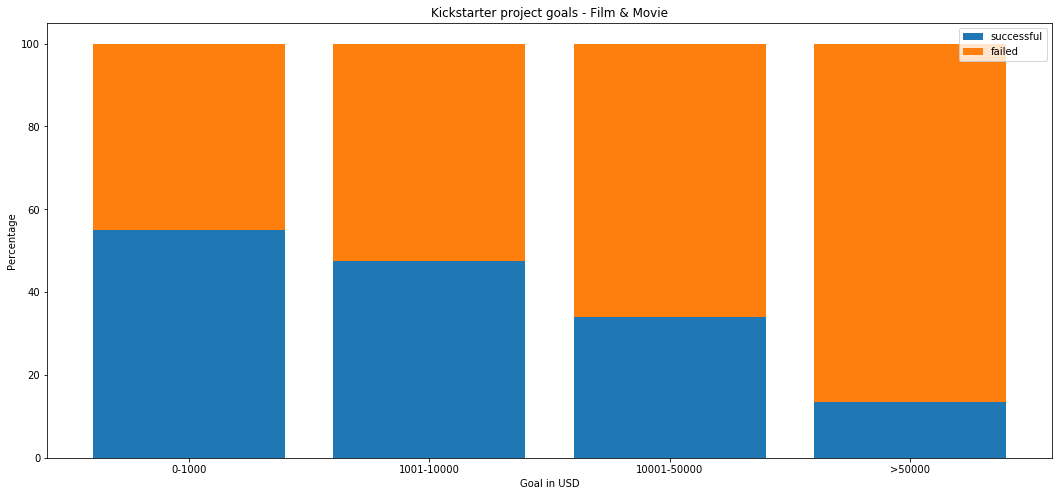

In [38]:
f_tot0 = film_succ_bars[0] + film_fail_bars[0]
f_tot1 = film_succ_bars[1] + film_fail_bars[1]
f_tot2 = film_succ_bars[2] + film_fail_bars[2]
f_tot3 = film_succ_bars[3] + film_fail_bars[3]

totals = [f_tot0, f_tot1, f_tot2, f_tot3]

f_succ_perc = [i/j * 100 for i,j in zip(film_succ_bars, totals)]
f_fail_perc = [i/j * 100 for i,j in zip(film_fail_bars, totals)]

plt.figure(figsize=(18,8))

plt.bar(y_pos, f_succ_perc, label='successful')
plt.bar(y_pos, f_fail_perc, bottom=f_succ_perc, label='failed')
plt.xticks(y_pos, bars)
plt.xlabel('Goal in USD')
plt.ylabel('Percentage')
plt.title('Kickstarter project goals - Film & Movie')
plt.legend()
plt.show()

## Games

### Duration

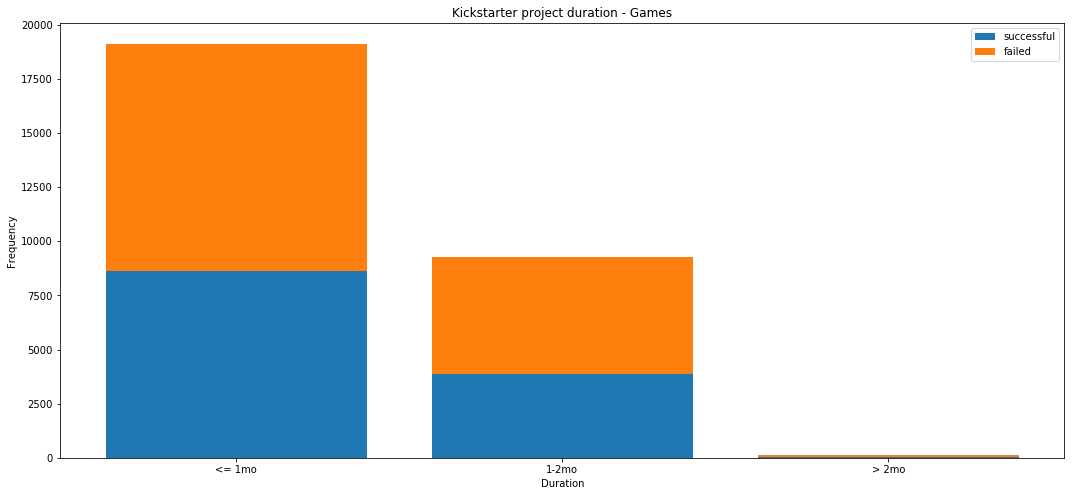

In [39]:
plt.figure(figsize=(18,8))

mo01 = games_succ[games_succ.duration <= 30]
mo12 = games_succ[(games_succ.duration > 30) & (games_succ.duration <= 60)]
mo2 = games_succ[games_succ.duration > 60]

games_succ_bars = [len(mo01), len(mo12), len(mo2)]

mo01 = games_fail[games_fail.duration <= 30]
mo12 = games_fail[(games_fail.duration > 30) & (games_fail.duration <= 60)]
mo2 = games_fail[games_fail.duration > 60]

games_fail_bars = [len(mo01), len(mo12), len(mo2)]

bars = ['<= 1mo', '1-2mo', '> 2mo']
y_pos = np.arange(len(bars))

plt.bar(y_pos, games_succ_bars, label='successful')
plt.bar(y_pos, games_fail_bars, bottom=games_succ_bars, label='failed')
plt.xticks(y_pos, bars)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Kickstarter project duration - Games')
plt.legend()
plt.show()

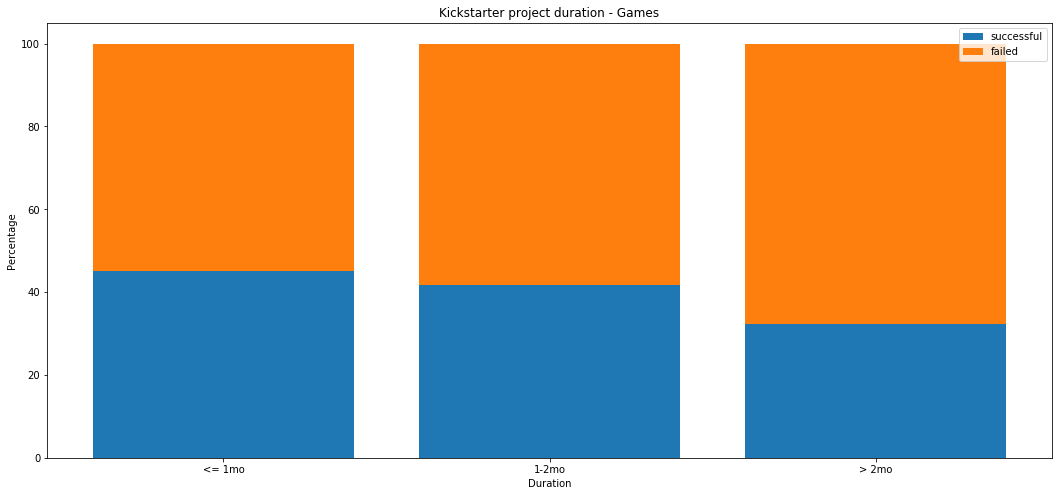

In [40]:
g_tot0 = games_succ_bars[0] + games_fail_bars[0]
g_tot1 = games_succ_bars[1] + games_fail_bars[1]
g_tot2 = games_succ_bars[2] + games_fail_bars[2]

totals = [g_tot0, g_tot1, g_tot2]

g_succ_perc = [i/j * 100 for i,j in zip(games_succ_bars, totals)]
g_fail_perc = [i/j * 100 for i,j in zip(games_fail_bars, totals)]

plt.figure(figsize=(18,8))

plt.bar(y_pos, g_succ_perc, label='successful')
plt.bar(y_pos, g_fail_perc, bottom=g_succ_perc, label='failed')
plt.xticks(y_pos, bars)
plt.xlabel('Duration')
plt.ylabel('Percentage')
plt.title('Kickstarter project duration - Games')
plt.legend()
plt.show()

### Goals

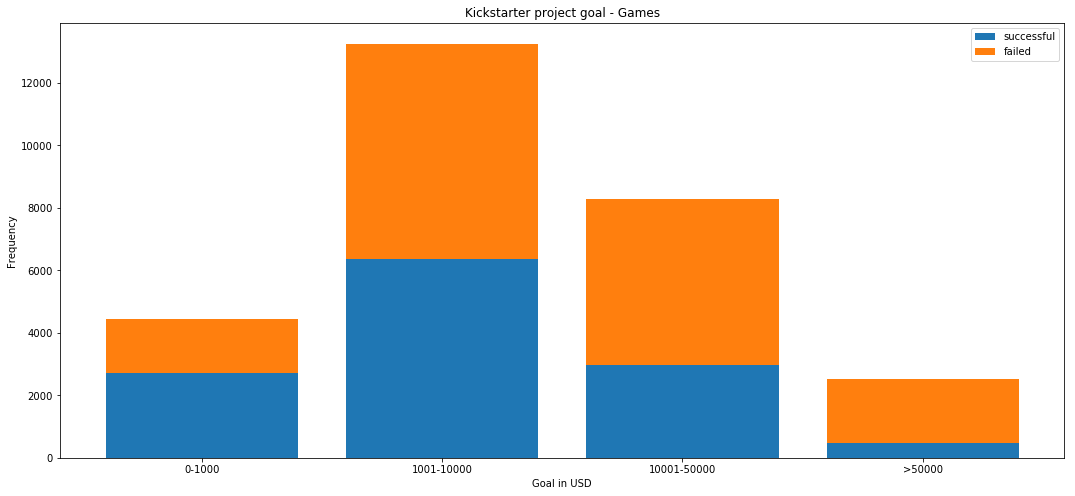

In [41]:
gs0 = games_succ[games_succ.usd_goal_real <= 1000]
gs1 = games_succ[(games_succ.usd_goal_real > 1000) & (games_succ.usd_goal_real <= 10000)]
gs2 = games_succ[(games_succ.usd_goal_real > 10000) & (games_succ.usd_goal_real <= 50000)]
gs3 = games_succ[games_succ.usd_goal_real > 50000]

gf0 = games_fail[games_fail.usd_goal_real <= 1000]
gf1 = games_fail[(games_fail.usd_goal_real > 1000) & (games_fail.usd_goal_real <= 10000)]
gf2 = games_fail[(games_fail.usd_goal_real > 10000) & (games_fail.usd_goal_real <= 50000)]
gf3 = games_fail[games_fail.usd_goal_real > 50000]

games_succ_bars = [len(gs0),len(gs1),len(gs2),len(gs3)]
games_fail_bars = [len(gf0),len(gf1),len(gf2),len(gf3)]

bars = ['0-1000', '1001-10000', '10001-50000', '>50000']
y_pos = np.arange(len(bars))

plt.figure(figsize=(18,8))

plt.bar(y_pos, games_succ_bars, label='successful')
plt.bar(y_pos, games_fail_bars, bottom=games_succ_bars, label='failed')
plt.xticks(y_pos, bars)
plt.xlabel('Goal in USD')
plt.ylabel('Frequency')
plt.title('Kickstarter project goal - Games')
plt.legend()
plt.show()

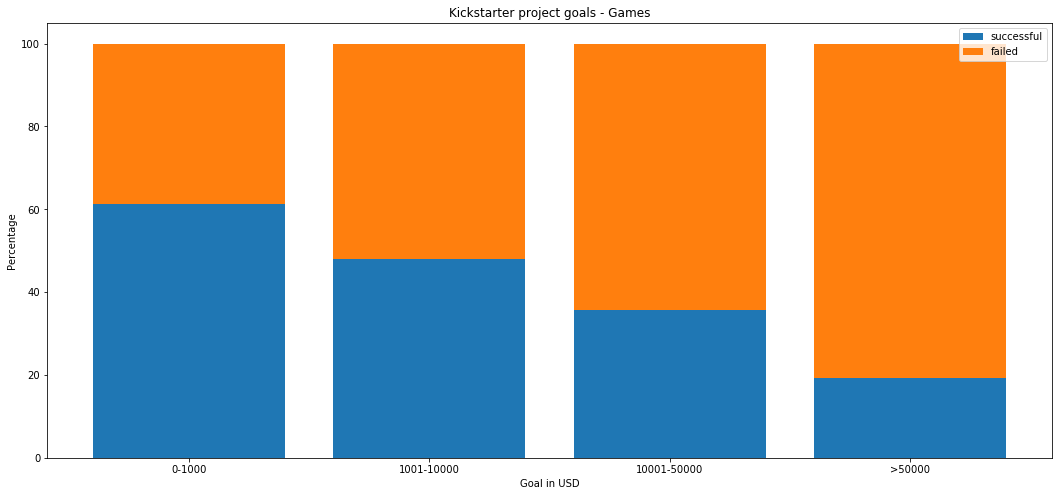

In [42]:
g_tot0 = games_succ_bars[0] + games_fail_bars[0]
g_tot1 = games_succ_bars[1] + games_fail_bars[1]
g_tot2 = games_succ_bars[2] + games_fail_bars[2]
g_tot3 = games_succ_bars[3] + games_fail_bars[3]

totals = [g_tot0, g_tot1, g_tot2, g_tot3]

g_succ_perc = [i/j * 100 for i,j in zip(games_succ_bars, totals)]
g_fail_perc = [i/j * 100 for i,j in zip(games_fail_bars, totals)]

plt.figure(figsize=(18,8))

plt.bar(y_pos, g_succ_perc, label='successful')
plt.bar(y_pos, g_fail_perc, bottom=g_succ_perc, label='failed')
plt.xticks(y_pos, bars)
plt.xlabel('Goal in USD')
plt.ylabel('Percentage')
plt.title('Kickstarter project goals - Games')
plt.legend()
plt.show()

# Correlations between success, duration and the goal

In [43]:
projects_corr = projects.copy()

success = np.where(projects_corr['state'] == 'successful',1,0)
projects_corr['success'] = success

projects_corr = projects_corr.drop(['backers','state', 'main_category', 'deadline', 'goal', 'launched', 'pledged', 'usd pledged', 'usd_pledged_real','launched_notime'], axis=1)
# projects_corr = projects_corr.drop(['backers','state', 'main_category', 'deadline', 'launched', 'usd pledged', 'usd_pledged_real','launched_notime'], axis=1)
projects_corr.head(20)

,usd_goal_real,duration,success
0,1533.95,59,0
1,30000.00,60,0
2,45000.00,45,0
3,5000.00,30,0
5,50000.00,35,1
6,1000.00,20,1
7,25000.00,45,0
10,2406.39,30,0
11,12500.00,30,1
12,5000.00,30,0


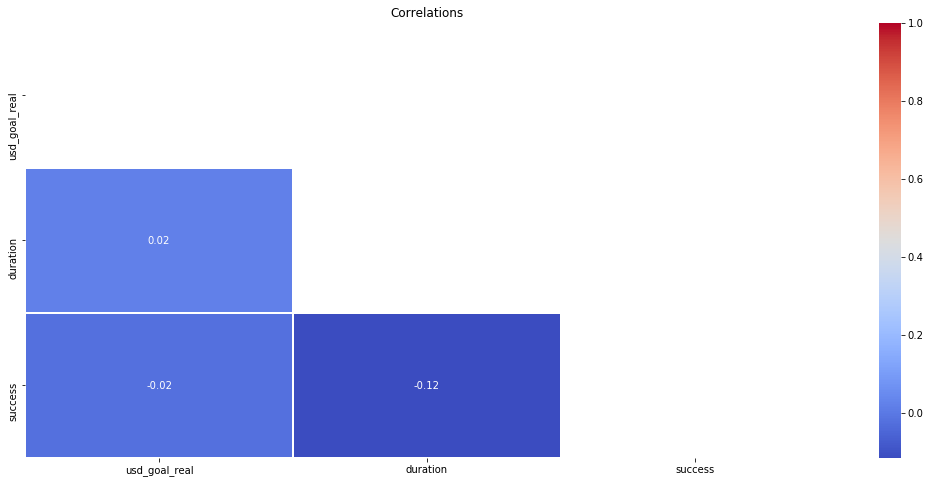

In [44]:
mat = np.zeros_like(projects_corr.corr(), dtype=np.bool)
mat[np.triu_indices_from(mat)] = True

plt.figure(figsize=(18,8))
sns.heatmap(projects_corr.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f', linewidths=.5, mask=mat)
plt.title('Correlations')
plt.show()

Going by the explored datatypes, it doesn't show much correlation in regards to a campaign failing or not. However, most notable is that there is a weak negative correlation between the duration of the campaign and the success of a project.

Interestingly enough, it is not the expected result as the previous visualizations showed (i.e. there is a lower likelihood that a campaign will succeed the higher the goal is set). Therefore, we want to look at the correlations between the classes(categories) goal <1000, goal 1000-10000, goal 10000-50000, goal >50000, duration 0-1mo, duration 1-2mo and duration 2+mo.

## Correlation between duration and goal classes

In [45]:
projects_corr2 = projects.copy()

success = np.where(projects_corr2['state'] == 'successful',1,0)
projects_corr2['success'] = success

duration_class = np.where(projects_corr2['duration'] <= 30, 1, np.where(((projects_corr2['duration'] > 30) & (projects_corr2['duration'] <= 60)), 2, np.where(projects_corr2['duration'] > 60, 3, 0)))
projects_corr2['duration_class'] = duration_class

goal_class = np.where(
	projects_corr2['usd_goal_real'] <= 1000, 1, np.where(
		((projects_corr2['usd_goal_real'] > 1000) & (projects_corr2['usd_goal_real'] <= 10000)), 2, np.where(
			((projects_corr2['usd_goal_real'] > 10000) & (projects_corr2['usd_goal_real'] <= 50000)), 3, np.where(
				projects_corr2['usd_goal_real'] > 50000, 4,0
			)
		)
	)
)
projects_corr2['goal_class'] = goal_class

projects_corr2 = projects_corr2.drop(['usd_goal_real','duration','backers','state', 'main_category', 'deadline', 'goal', 'launched', 'pledged', 'usd pledged', 'usd_pledged_real','launched_notime'], axis=1)
projects_corr2.head(20)

,success,duration_class,goal_class
0,0,2,2
1,0,2,3
2,0,2,3
3,0,1,2
5,1,2,3
6,1,1,1
7,0,2,3
10,0,1,2
11,1,1,3
12,0,1,2


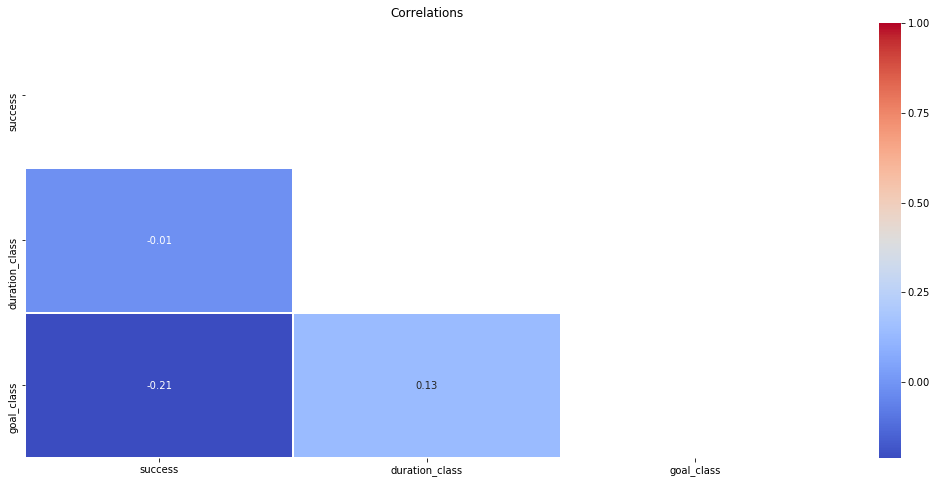

In [46]:
mat = np.zeros_like(projects_corr2.corr(), dtype=np.bool)
mat[np.triu_indices_from(mat)] = True

plt.figure(figsize=(18,8))
sns.heatmap(projects_corr2.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f', linewidths=.5, mask=mat)
plt.title('Correlations')
plt.show()

This correlation graph shows a more emphasized negative correlation between the success of a campaign and the goal.

But what if you classify a combination of duration and goal set?

In [47]:
pc3 = projects_corr2.copy()

pc3_d1 = pc3[pc3['duration_class']==1]
pc3_d2 = pc3[pc3['duration_class']==2]
pc3_d3 = pc3[pc3['duration_class']==3]

pc3_d1 = pc3_d1.drop(['duration_class'], axis=1)
pc3_d2 = pc3_d2.drop(['duration_class'], axis=1)
pc3_d3 = pc3_d3.drop(['duration_class'], axis=1)
                    
pc3_g1 = pc3[pc3['goal_class']==1]
pc3_g2 = pc3[pc3['goal_class']==2]
pc3_g3 = pc3[pc3['goal_class']==3]
pc3_g4 = pc3[pc3['goal_class']==4]
                     
pc3_g1 = pc3_g1.drop(['goal_class'], axis=1)
pc3_g2 = pc3_g2.drop(['goal_class'], axis=1)
pc3_g3 = pc3_g3.drop(['goal_class'], axis=1)
pc3_g4 = pc3_g4.drop(['goal_class'], axis=1)

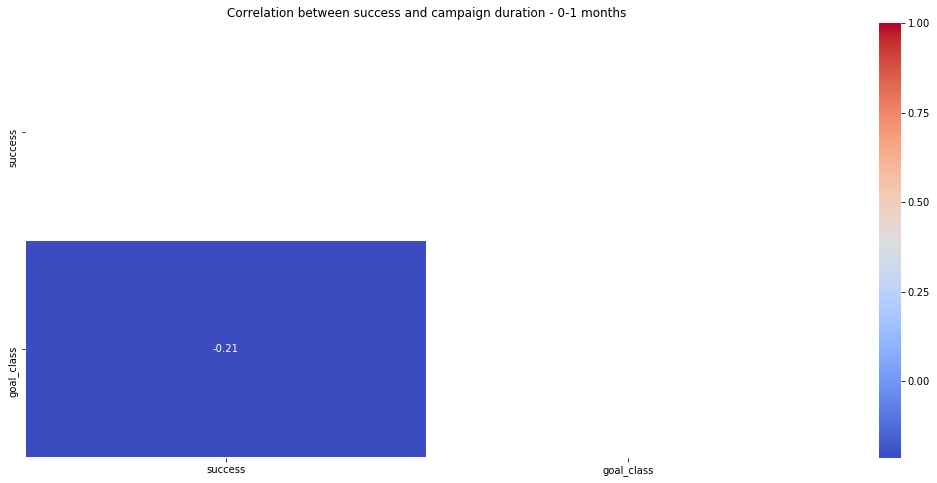

In [48]:
mat = np.zeros_like(pc3_d1.corr(), dtype=np.bool)
mat[np.triu_indices_from(mat)] = True

plt.figure(figsize=(18,8))
sns.heatmap(pc3_d1.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f', linewidths=.5, mask=mat)
plt.title('Correlation between success and campaign duration - 0-1 months')
plt.show()

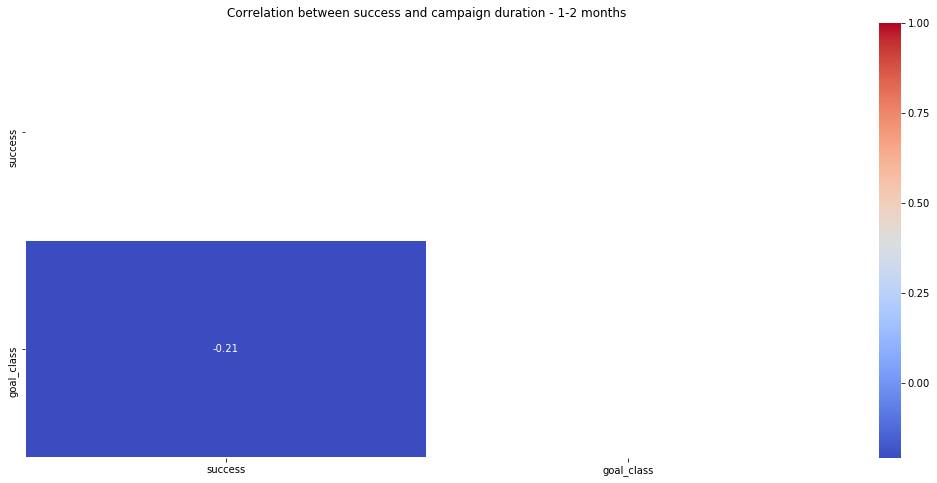

In [49]:
mat = np.zeros_like(pc3_d2.corr(), dtype=np.bool)
mat[np.triu_indices_from(mat)] = True

plt.figure(figsize=(18,8))
sns.heatmap(pc3_d2.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f', linewidths=.5, mask=mat)
plt.title('Correlation between success and campaign duration - 1-2 months')
plt.show()

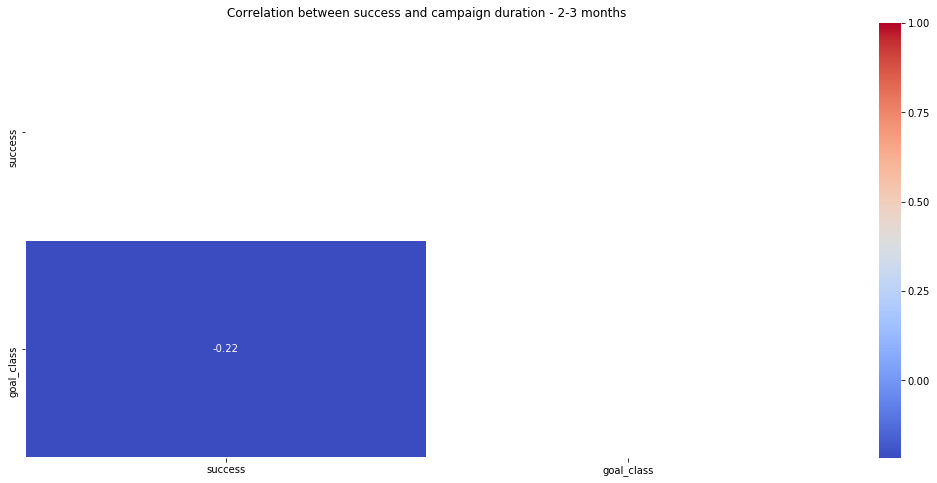

In [50]:
mat = np.zeros_like(pc3_d3.corr(), dtype=np.bool)
mat[np.triu_indices_from(mat)] = True

plt.figure(figsize=(18,8))
sns.heatmap(pc3_d3.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f', linewidths=.5, mask=mat)
plt.title('Correlation between success and campaign duration - 2-3 months')
plt.show()

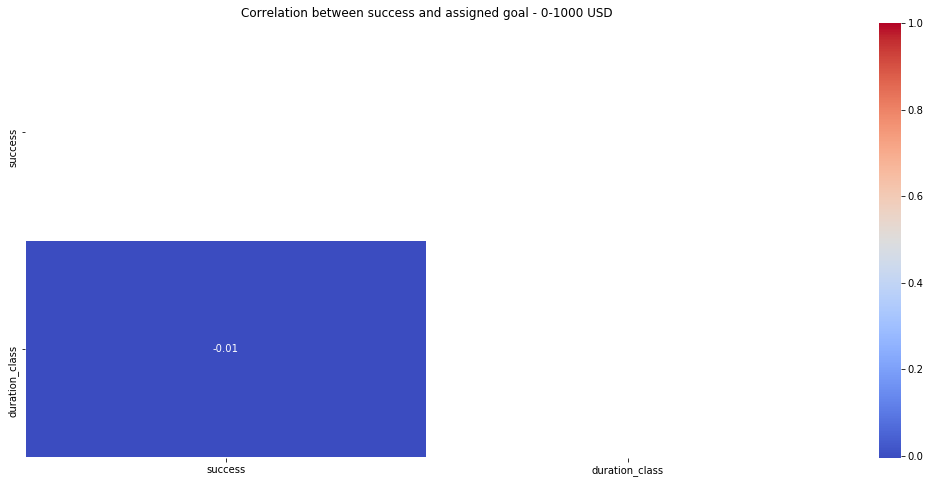

In [51]:
mat = np.zeros_like(pc3_g1.corr(), dtype=np.bool)
mat[np.triu_indices_from(mat)] = True

plt.figure(figsize=(18,8))
sns.heatmap(pc3_g1.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f', linewidths=.5, mask=mat)
plt.title('Correlation between success and assigned goal - 0-1000 USD')
plt.show()

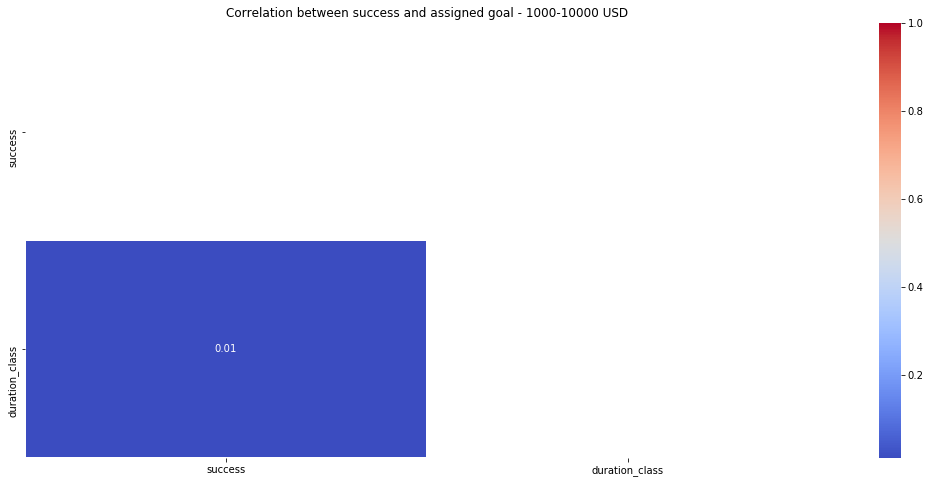

In [52]:
mat = np.zeros_like(pc3_g2.corr(), dtype=np.bool)
mat[np.triu_indices_from(mat)] = True

plt.figure(figsize=(18,8))
sns.heatmap(pc3_g2.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f', linewidths=.5, mask=mat)
plt.title('Correlation between success and assigned goal - 1000-10000 USD')
plt.show()

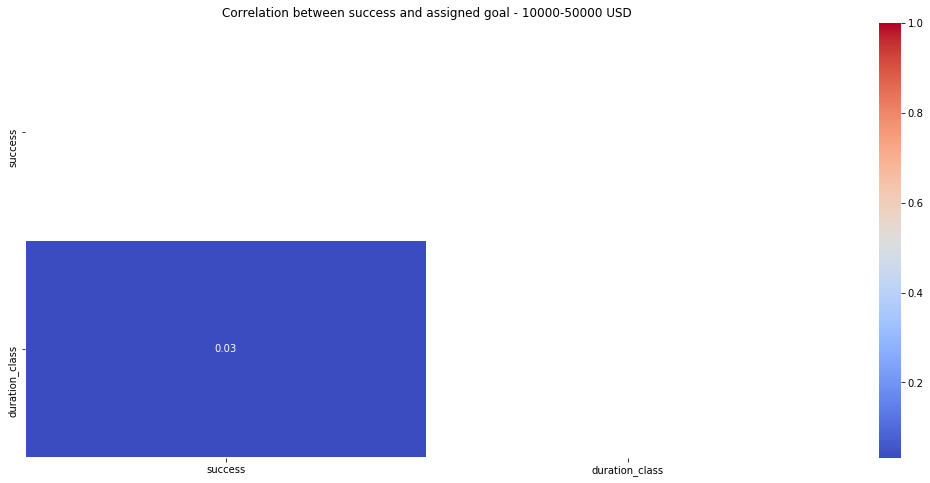

In [53]:
mat = np.zeros_like(pc3_g3.corr(), dtype=np.bool)
mat[np.triu_indices_from(mat)] = True

plt.figure(figsize=(18,8))
sns.heatmap(pc3_g3.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f', linewidths=.5, mask=mat)
plt.title('Correlation between success and assigned goal - 10000-50000 USD')
plt.show()

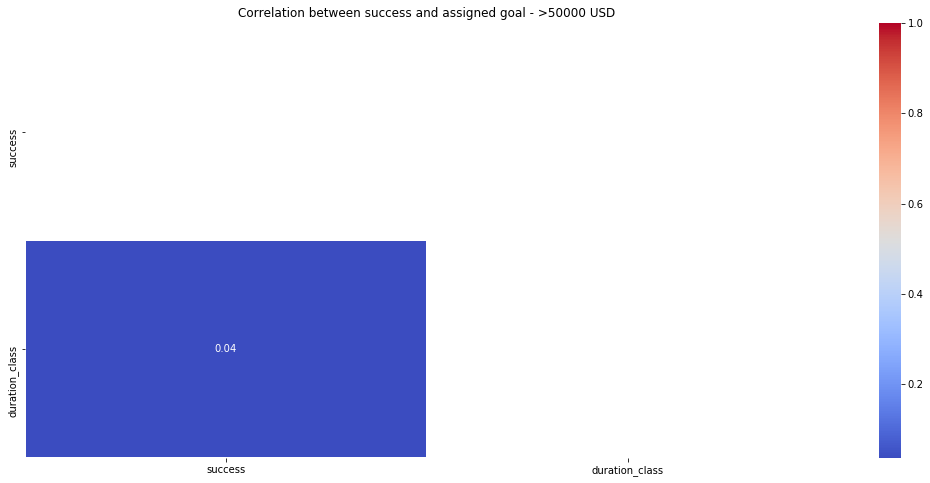

In [54]:
mat = np.zeros_like(pc3_g4.corr(), dtype=np.bool)
mat[np.triu_indices_from(mat)] = True

plt.figure(figsize=(18,8))
sns.heatmap(pc3_g4.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f', linewidths=.5, mask=mat)
plt.title('Correlation between success and assigned goal - >50000 USD')
plt.show()

From the above observations, nothing changed in regards to how strong the correlation is, which could indicate that the duration of a campaign is not related to your project failing or not. It can be concluded that not setting your goal too high is more beneficial towards the success of the project.

## Further mentions

The kernel given at https://www.kaggle.com/shivamb/an-insightful-story-of-crowdfunding-projects mentions that a concise title affects the success of a backing project, as well as the goal set, in which month (and more precisely, which week) it is launched and the duration of the campaign.